# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities= []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

In [74]:
#Save url information 
url= "http://api.openweathermap.org/data/2.5/weather?"

#Build partial query URL to loop through cities
# query_url = f"{url}&q={cities[1]}&appid={weather_api_key}"

# city_weather= requests.get(query_url).json()



### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
#for each city in cities call API and gather information
# Perform a weather check on each city using a series of successive API calls.
city_name= []
city_lat= []
city_lon = []
city_maxtemp = []
city_humidity = []
city_cloudiness = []
city_windspeed = []
city_country= []
city_date= []

units="imperial"

Record = 1

print("Beginning Data Retrieval")
print("-------------------------")

for x in cities: 
    # Include a print log of each city as it's being processed (with the city number and city name).
    print(f"Processing Record {Record}: {x}")
    Record += 1

    #Build partial query URL to loop through cities
    query_url = f"{url}&q={x}&appid={weather_api_key}&units={units}"

    #"JSONify" the response to pull out variables
    city_weather= requests.get(query_url).json()

    #Set the system to only run once per second as to not crash
    time.sleep(1)

    #Append the lists to be able to create a df
    try:
        city_name.append(city_weather["name"])   
        city_lat.append(city_weather["coord"]["lat"])
        city_lon.append(city_weather["coord"]["lon"])
        city_maxtemp.append(city_weather["main"]["temp_max"])
        city_humidity.append(city_weather["main"]["humidity"])
        city_cloudiness.append(city_weather["clouds"]["all"])
        city_windspeed.append(city_weather["wind"]["speed"])
        city_country.append(city_weather["sys"]["country"])
        city_date.append(city_weather["dt"])

    #Need the forced guidance to make sure to skip if a city is not found by API
    except KeyError:
        print("City not found. Skipping ...")





i
Processing Record 43: port alfred
Processing Record 44: san lorenzo
Processing Record 45: hanzhong
Processing Record 46: sovetskiy
Processing Record 47: kabare
Processing Record 48: flin flon
Processing Record 49: pokhara
Processing Record 50: taolanaro
City not found. Skipping ...
Processing Record 51: khatanga
Processing Record 52: iqaluit
Processing Record 53: tahta
Processing Record 54: busselton
Processing Record 55: canico
Processing Record 56: banda aceh
Processing Record 57: mahebourg
Processing Record 58: katsuura
Processing Record 59: college
Processing Record 60: domoni
Processing Record 61: grand gaube
Processing Record 62: saint-philippe
Processing Record 63: puerto ayora
Processing Record 64: lulea
Processing Record 65: sao filipe
Processing Record 66: bengkulu
Processing Record 67: wagar
Processing Record 68: la rochelle
Processing Record 69: bredasdorp
Processing Record 70: lorengau
Processing Record 71: bend
Processing Record 72: narsaq
Processing Record 73: san quin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
#Creating data frame from city data lists pulled above 
city_data = pd.DataFrame(
    {'City Name': city_name,
     'Latitude': city_lat,
     'Longitude': city_lon, 
     'Max Temperature': city_maxtemp, 
     'Humidity': city_humidity, 
     'Cloudiness': city_cloudiness, 
     'Wind Speed': city_windspeed, 
     'Country': city_country, 
     'Date': city_date}) 

city_data.sample(10)

,City Name,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
215,Kuandian,40.73,124.78,14.67,67,100,0.72,CN,1609728426
269,Uthal,25.81,66.62,55.18,32,0,4.54,PK,1609728492
351,Belyy Yar,53.60,91.39,-4.00,76,90,4.47,RU,1609728586
217,Ferme-Neuve,46.70,-75.45,21.20,92,80,3.04,CA,1609728429
310,Indiana,40.00,-86.25,34.00,98,90,3.71,US,1609728539
340,Vardø,70.37,31.11,31.98,94,68,8.21,NO,1609728573
252,Baracoa,20.35,-74.50,72.10,77,16,0.87,CU,1609728470
405,Tailai,46.38,123.40,1.08,69,0,2.75,CN,1609728652
73,Russell,32.35,-85.20,46.40,93,1,3.51,US,1609728257
373,Lagoa,39.05,-27.98,62.83,85,100,30.44,PT,1609728614


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [80]:
#  Get the indices of cities that have humidity over 100%.
#Removing any cities with humidity over 100% 
Final_city_data = city_data[city_data["Humidity"] <= 100]

Final_city_data.head()

,City Name,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Poya,-21.35,165.15,84.61,72,100,2.75,NC,1609728176
1,Pevek,69.70,170.31,-18.15,89,72,6.80,RU,1609728178
2,New Norfolk,-42.78,147.06,69.01,52,93,3.00,AU,1609728179
3,Kapaa,22.08,-159.32,78.80,65,90,13.87,US,1609728180
4,Mount Isa,-20.73,139.50,91.40,41,75,6.93,AU,1609728181


In [81]:
# Save dataframe to output location 
Final_city_data.to_csv(output_data_file, index= False, header= True)

# Read CSV 
Final_city_data= pd.read_csv(output_data_file)

In [82]:
Final_city_data.head()

,City Name,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Poya,-21.35,165.15,84.61,72,100,2.75,NC,1609728176
1,Pevek,69.70,170.31,-18.15,89,72,6.80,RU,1609728178
2,New Norfolk,-42.78,147.06,69.01,52,93,3.00,AU,1609728179
3,Kapaa,22.08,-159.32,78.80,65,90,13.87,US,1609728180
4,Mount Isa,-20.73,139.50,91.40,41,75,6.93,AU,1609728181


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

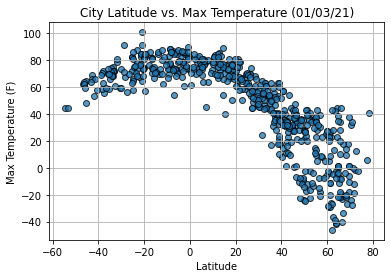

In [36]:
x_values = Final_city_data["Latitude"]
y_values = Final_city_data["Max Temperature"]
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (01/03/21)")
plt.grid()

plt.savefig('../output_data/Fig1.png')

## Latitude vs. Humidity Plot

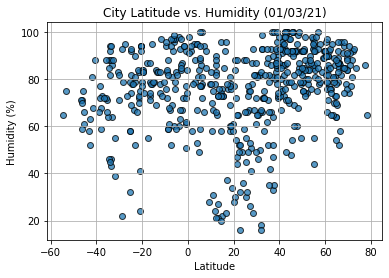

In [37]:
x_values = Final_city_data["Latitude"]
y_values = Final_city_data["Humidity"]
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (01/03/21)")
plt.grid()

plt.savefig('../output_data/Fig2.png')

## Latitude vs. Cloudiness Plot

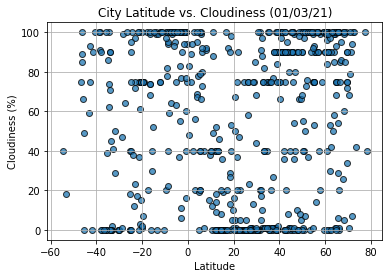

In [38]:
x_values = Final_city_data["Latitude"]
y_values = Final_city_data["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (01/03/21)")
plt.grid()
plt.savefig('../output_data/Fig3.png')

## Latitude vs. Wind Speed Plot

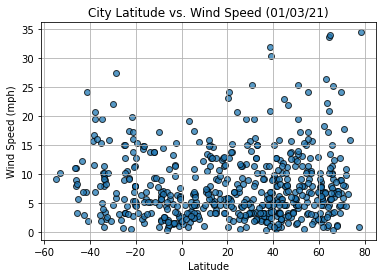

In [39]:
x_values = Final_city_data["Latitude"]
y_values = Final_city_data["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (01/03/21)")
plt.grid()
plt.savefig('../output_data/Fig4.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [45]:
#Get only Northern Hemisphere data
Northern_hemisphere = Final_city_data[Final_city_data["Latitude"] >= 0]


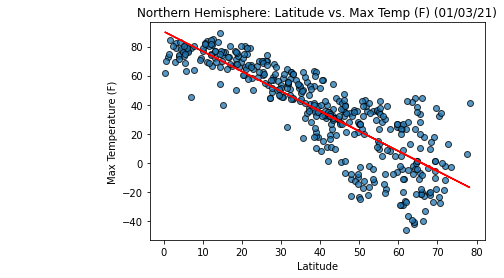

The r-value is:-0.8428025419473096


In [54]:
#Graphing only Northern Hemisphere Lat vs temp with linear regression 
x_values = Northern_hemisphere["Latitude"]
y_values = Northern_hemisphere["Max Temperature"]
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere: Latitude vs. Max Temp (F) (01/03/21)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-40,0), fontsize = 15, color= "red")
plt.show()

print("The r-value is:" + str(rvalue))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [55]:
#Get only Southern Hemisphere data
Southern_hemisphere = Final_city_data[Final_city_data["Latitude"] <= 0]

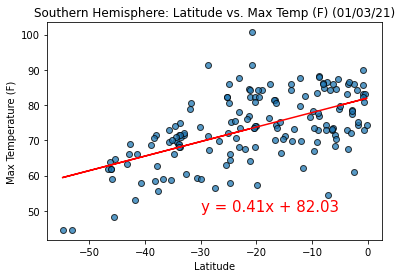

The r-value is:0.575700221276441


In [59]:
#Graphing only Southern Hemisphere Lat vs temp with linear regression 
x_values = Southern_hemisphere["Latitude"]
y_values = Southern_hemisphere["Max Temperature"]
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere: Latitude vs. Max Temp (F) (01/03/21)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-30,50), fontsize = 15, color= "red")
plt.show()

print("The r-value is:" + str(rvalue))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

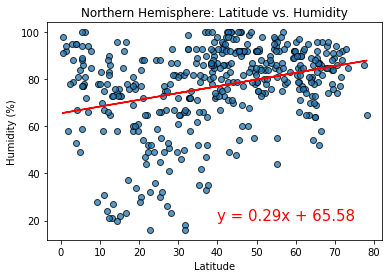

The r-value is:0.30788598260033856


In [65]:
x_values = Northern_hemisphere["Latitude"]
y_values = Northern_hemisphere["Humidity"]
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere: Latitude vs. Humidity")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40,20), fontsize = 15, color= "red")
plt.show()

print("The r-value is:" + str(rvalue))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

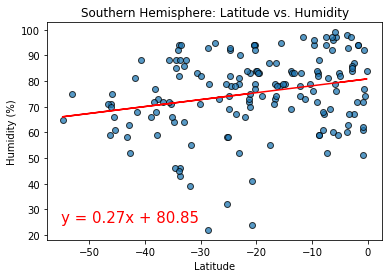

The r-value is:0.24532343914754173


In [67]:
x_values = Southern_hemisphere["Latitude"]
y_values = Southern_hemisphere["Humidity"]
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere: Latitude vs. Humidity")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,25), fontsize = 15, color= "red")
plt.show()

print("The r-value is:" + str(rvalue))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

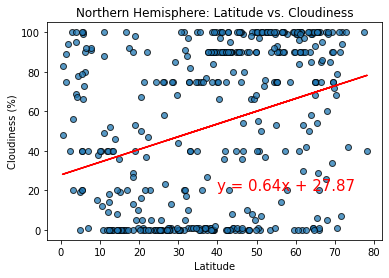

The r-value is:0.3127143277319519


In [68]:
x_values = Northern_hemisphere["Latitude"]
y_values = Northern_hemisphere["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere: Latitude vs. Cloudiness")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40,20), fontsize = 15, color= "red")
plt.show()

print("The r-value is:" + str(rvalue))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

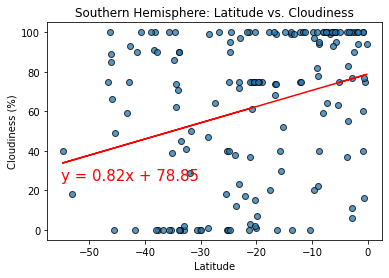

The r-value is:0.2971717554582187


In [69]:
x_values = Southern_hemisphere["Latitude"]
y_values = Southern_hemisphere["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere: Latitude vs. Cloudiness")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,25), fontsize = 15, color= "red")
plt.show()

print("The r-value is:" + str(rvalue))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

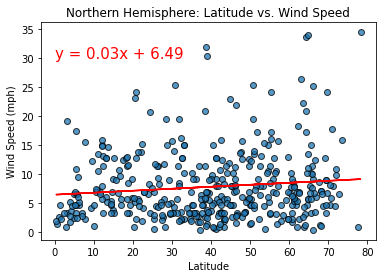

The r-value is:0.11387990534495224


In [73]:
x_values = Northern_hemisphere["Latitude"]
y_values = Northern_hemisphere["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere: Latitude vs. Wind Speed")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0,30), fontsize = 15, color= "red")
plt.show()

print("The r-value is:" + str(rvalue))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

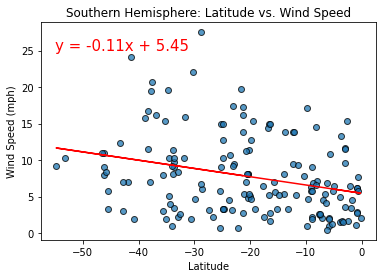

The r-value is:-0.2867065756733256


In [71]:
x_values = Southern_hemisphere["Latitude"]
y_values = Southern_hemisphere["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere: Latitude vs. Wind Speed")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,25), fontsize = 15, color= "red")
plt.show()

print("The r-value is:" + str(rvalue))